# Exercise 5: Clustering
This assignment is based on the previously generated 2-dimensional data of the three classes (5, 6 and 8) from the MNIST database of handwritten digits. 

First, mix the 2-dimensional data (training data only) by removing the labels and then use one Gaussian mixture model to model them. 

Secondly, compare the Gaussian mixture model with the Gaussian models trained in the previous assignment, in terms of mean and variance values as well as through visualisation.

## Loading the data and mixing
First we load the exercise data set, combine the individual training sets into one and shuffle the data to ensure a random shuffle (here with a seed to ensure reproducability). 

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal as norm

In [8]:
data_path = "data\\PCA_data.mat"
data = sio.loadmat(data_path)
train5 = data["trn5_2dim"]/255
train6 = data["trn6_2dim"]/255
train8 = data["trn8_2dim"]/255

trainset = np.concatenate([train5, train6, train8])
np.random.seed(0)
np.random.shuffle(trainset)

## Creating a Gaussian Mixture model
First create a Gaussian Mixture Model of the data using sklearn

In [9]:
model = GaussianMixture(n_components=3)
model.fit(trainset)

GaussianMixture(n_components=3)

## Creating Gaussian models
Following the same approach from the previous exercises we can also estimate Gaussian models for each class

In [10]:
#Estimate parameters for a bivariante Gaussian distribution.
train_means = np.zeros((3,2))
train_covs = np.zeros((3,2,2))

temp = [train5, train6, train8]

for i in range(3):
    train_means[i] = np.mean(temp[i], axis=0)
    train_covs[i] = np.cov(temp[i].T)


## Comparing means and covariance matrices.
Let's look at the means and covariance matrices.

First we extract the means and covariances from the GMM.

In [11]:
model_mean = model.means_
model_cov = model.covariances_

Now we can compare the GMM means and covariances to the Gaussin models estimated for each class individually.

### Means

In [12]:
# for name, mean in {"mean5": mean5, "mean6": mean6, "mean8": mean8, 
#                    "mean1_gmm": mean1_gmm, "mean2_gmm": mean2_gmm, "mean3_gmm": mean3_gmm}.items():
#     print(f"{name}: {np.array2string(mean)}")

print(f" train_mean5: {train_means[0]}\n gmm_mean5: {model_mean[0]}\n train_mean6: {train_means[1]}\n gmm_mean6: {model_mean[1]}\n train_mean8: {train_means[2]}\n gmm_mean8: {model_mean[2]}")

 train_mean5: [-1.09629628 -0.35037072]
 gmm_mean5: [-1.00261972 -2.06286597]
 train_mean6: [2.60384024 0.86074213]
 gmm_mean6: [3.10749821 0.52284066]
 train_mean8: [-1.61901038 -0.54586145]
 gmm_mean8: [-1.43832858  1.61367239]


### Covariances

Text(0.5, 1.0, 'Cov. GMM kernel 3')

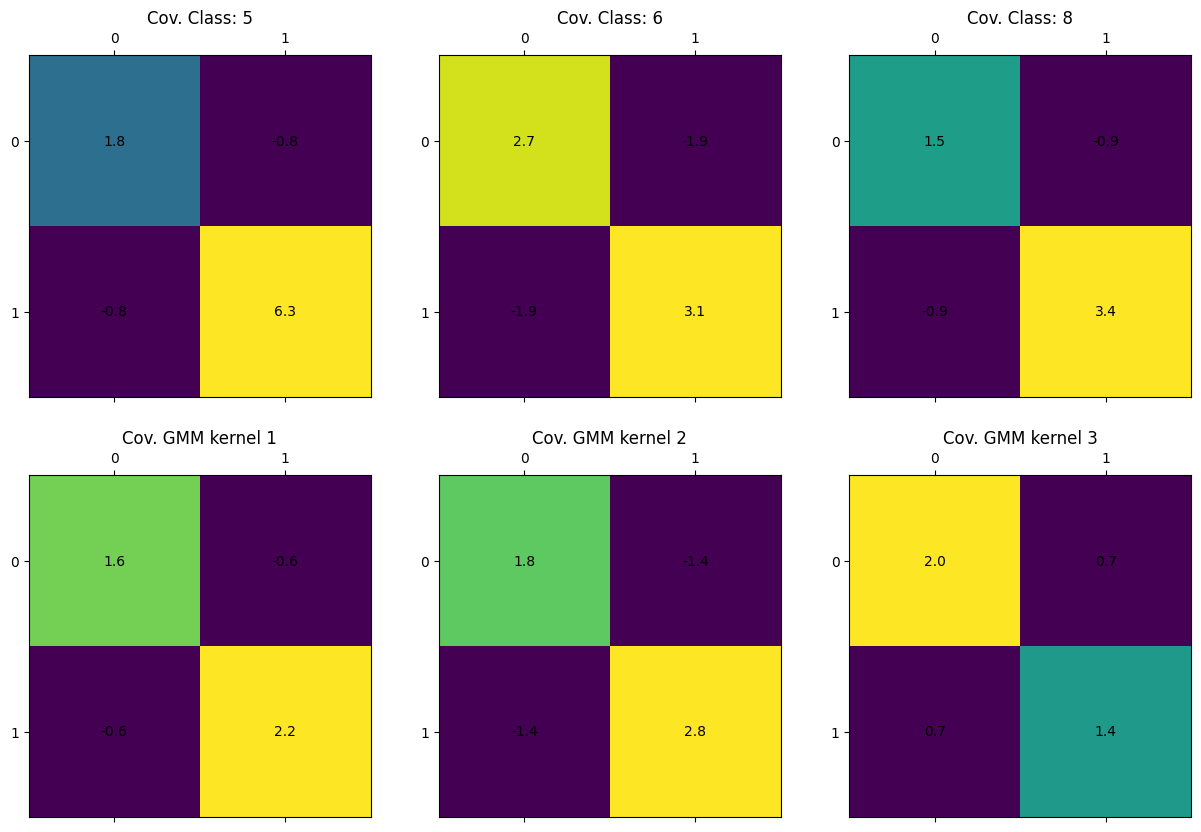

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))



axs[0, 0].matshow(train_covs[0])
for (i, j), z in np.ndenumerate(train_covs[0]):
    axs[0, 0].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[0, 0].set_title("Cov. Class: 5")

axs[1, 0].matshow(model_cov[0])
for (i, j), z in np.ndenumerate(model_cov[0]):
    axs[1, 0].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[1, 0].set_title("Cov. GMM kernel 1")

axs[0, 1].matshow(train_covs[1])
for (i, j), z in np.ndenumerate(train_covs[1]):
    axs[0, 1].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[0, 1].set_title("Cov. Class: 6")

axs[1, 1].matshow(model_cov[1])
for (i, j), z in np.ndenumerate(model_cov[1]):
    axs[1, 1].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[1, 1].set_title("Cov. GMM kernel 2")

axs[0, 2].matshow(train_covs[2])
for (i, j), z in np.ndenumerate(train_covs[2]):
    axs[0, 2].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[0, 2].set_title("Cov. Class: 8")

c = axs[1, 2].matshow(model_cov[2])
for (i, j), z in np.ndenumerate(model.covariances_[2]):
    axs[1, 2].text(j, i, f'{z:0.1f}', ha='center', va='center')
axs[1, 2].set_title("Cov. GMM kernel 3")

What do we see when comparing means and covariances?

## Visualizing the models in contourplots.
Now we would like to visualize our models to compare them.

We first generate some points to be able to sample from the models.

In [52]:
#Create points to do a contour a plot
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

We can also visualize the separate Gaussian models from the GMM by creating Gassians from the classwise means and covariances of the GMM model.

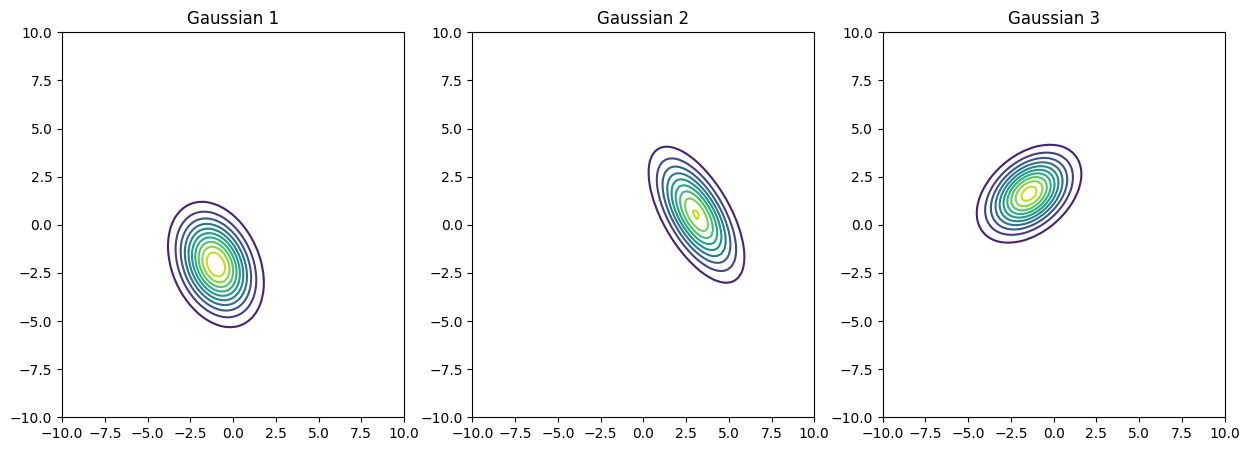

In [37]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# plot the separate gaussians from the GMM
for i in range(3):
    # sample the gaussian
    rv = norm(model_mean[i], model_cov[i])
    axs[i].contour(X, Y, rv.pdf(pos), levels=10)
    axs[i].set_title(f'Gaussian {i+1}')
    axs[i].set_xlim(-10, 10)
    axs[i].set_ylim(-10, 10)

plt.show()

Now we sample from the models using the generated points.

In [60]:
samples = np.exp(model.score_samples(pos.reshape(-1, 2)).reshape(100, 100))


The model samples can then be visualized in a contour plot.

C:\Users\clyho\AppData\Local\Temp\ipykernel_6208\3836674112.py:18: UserWarning: The following kwargs were not used by contour: 'color'
  axs[2].contour(X, Y, rv.pdf(pos), levels=8, color=['black', 'red', 'blue'])


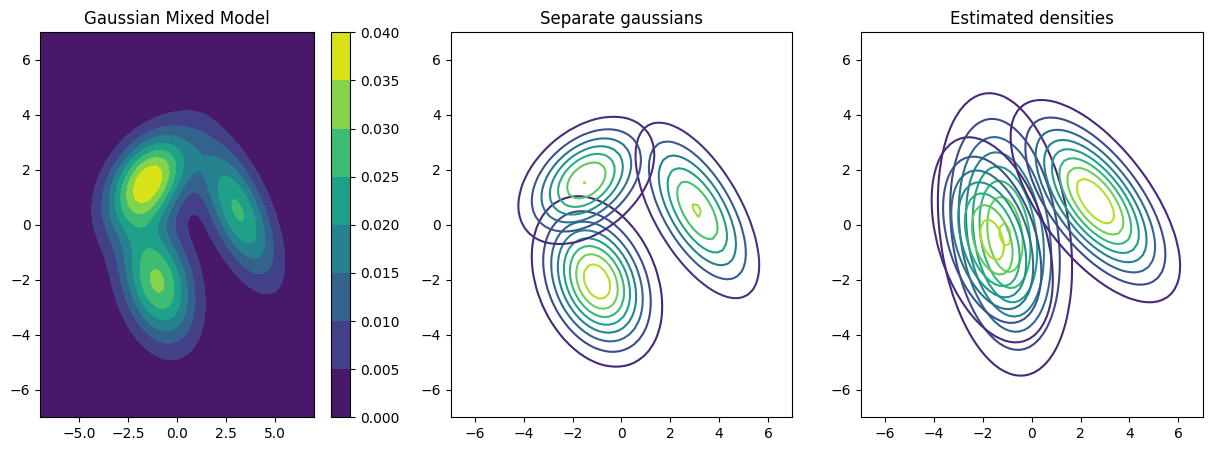

In [72]:
#Plot contours for the GMM, seperated GMM and individual estimated densities
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

contour = axs[0].contourf(X, Y, samples, levels=8)
cbar = fig.colorbar(contour)
axs[0].set_title('Gaussian Mixed Model')
axs[0].set_xlim(-7, 7)
axs[0].set_ylim(-7, 7)
for i in range(3):
    # sample the gaussian
    rv = norm(model_mean[i], model_cov[i])
    axs[1].contour(X, Y, rv.pdf(pos), levels=8)
    axs[1].set_title('Separate gaussians')
    axs[1].set_xlim(-7, 7)
    axs[1].set_ylim(-7, 7)
for i in range(3):
    rv = norm(train_means[i], train_covs[i])
    axs[2].contour(X, Y, rv.pdf(pos), levels=8, color=['black', 'red', 'blue'])
    axs[2].set_title('Estimated densities')
    axs[2].set_xlim(-7, 7)
    axs[2].set_ylim(-7, 7)
plt.show()